# coronasaurus
This repository is coronasaurus's entry to NERC's [COVID-19 Hackathon 2: Recovery](https://digitalenvironment.org/home/covid-19-digital-sprint-hackathons/covid-19-hackathon-2-recovery/).

## Introduction
The unprecedented global response to the COVID-19 pandemic has resulted in huge population behavioural changes; from the cessation of travel to a transition to remote working. We don't often see changes of this magnitude, which offers researchers the unique opportunity to evaluate the impact of lockdown measures.

One particular area of interest is the impact on greenhouse gas emissions. As a signatory of the Paris Agreement the UK has a responsibility to limit the global average temperature rise to below 2&deg;C, but this is an ambitious task! Can we use data from this event to evaluate the sort of changes that might need to be made to meet these climate goals?

In [2]:
from notebook import notebookapp
from IPython.display import display, Markdown

display(Markdown("### Notebook"))

servers = list(notebookapp.list_running_servers())
if servers[0]['hostname'] == 'localhost':
    
    display(Markdown(
        """You're currently viewing this notebook locally. You could also run it online in an interactive binder by clicking below:\\
        [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/aricooperdavis/coronasaurus_NERCHackathonTwo_Multivariate/master?urlpath=%2Flab%2Fcoronasaurus.ipynb)"""))
else:
    display(Markdown(
        """You're currently viewing this notebook remotely.
        You can also [download this notebook](https://github.com/aricooperdavis/coronasaurus_NERCHackathonTwo_Multivariate/blob/master/coronasaurus.ipynb) and run it locally in Jupyter."""))

### Notebook

You're currently viewing this notebook locally. You could also run it online in an interactive binder by clicking below:\
        [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/aricooperdavis/coronasaurus_NERCHackathonTwo_Multivariate/master?urlpath=%2Flab%2Fcoronasaurus.ipynb)

## Energy
Our first consideration is energy; how is home working changing the balance and timing of energy demand in the UK?

### Octopus energy
The utility company, Octopus, have been doing their own data-analysis on energy demand data from their smart meters, and kindly made their results available [on their website](https://tech.octopus.energy/data-discourse/2020-social-distancing/index.html). We pulled the raw data from these graphs so that we could perform our own analysis on it. If you're playing along at home then you can see how we did that [here](/grid/octopus/octopus-plotly-extraction.ipynb).

In [3]:
from grid import octopusdata
octopus = octopusdata.OctopusData(data_file='./grid/octopus/octopus.csv', weather_file='./grid/octopus/UK_weather.csv')

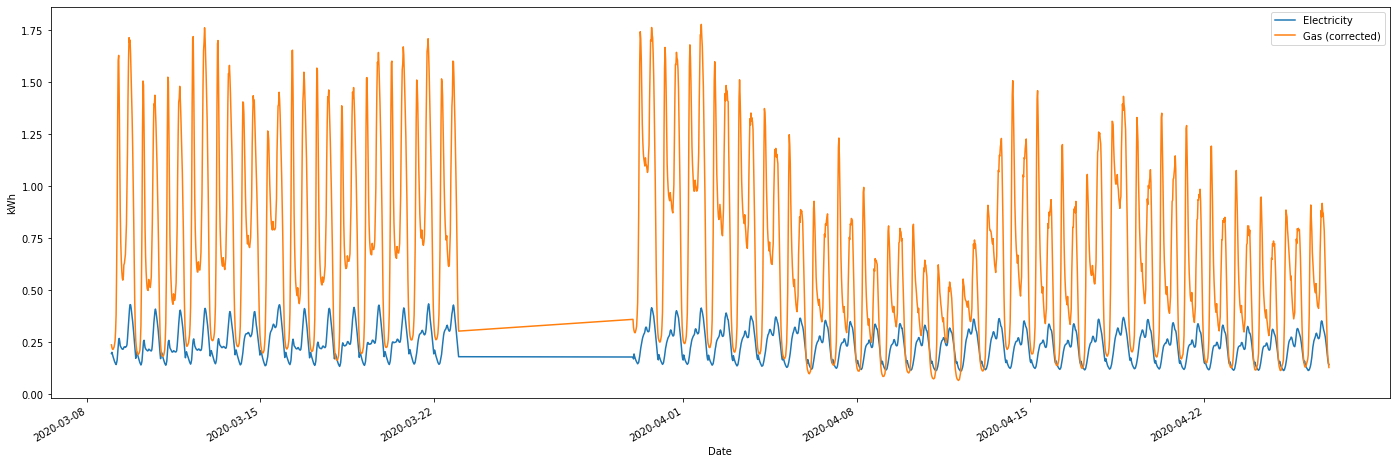

In [4]:
octopus.plot_timeline()

The plot above shows what we managed to get; 6 weeks of half-hourly electricity and gas (seasonally corrected) usage averaged over 115,000 smart meters - with one missing week.

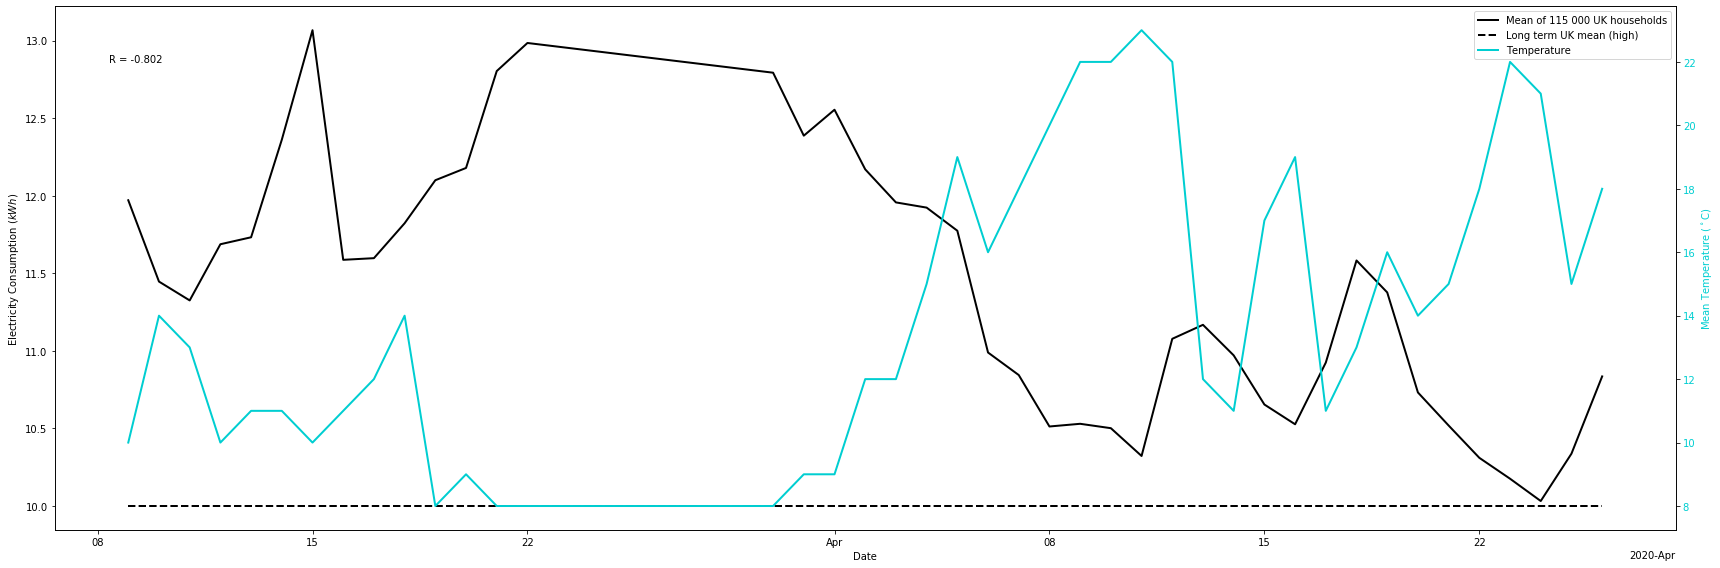

In [5]:
octopus.plot_daily_electricity(figsize=(24,8), plot_temperature=True, colors=['k', 'darkturquoise'])

Whilst electricity demand is well above the long term UK mean throughout lockdown, there is a downward trend, suggesting that population behaviour adjusts over pronounced periods of working from home in a way that reduces overall electricity demand. However, we need to make sure that this decrease can't be explained by any other variables, which is why we've included the mean UK temperature for that period. There does seem to be a strong relationship between temperature and demand.

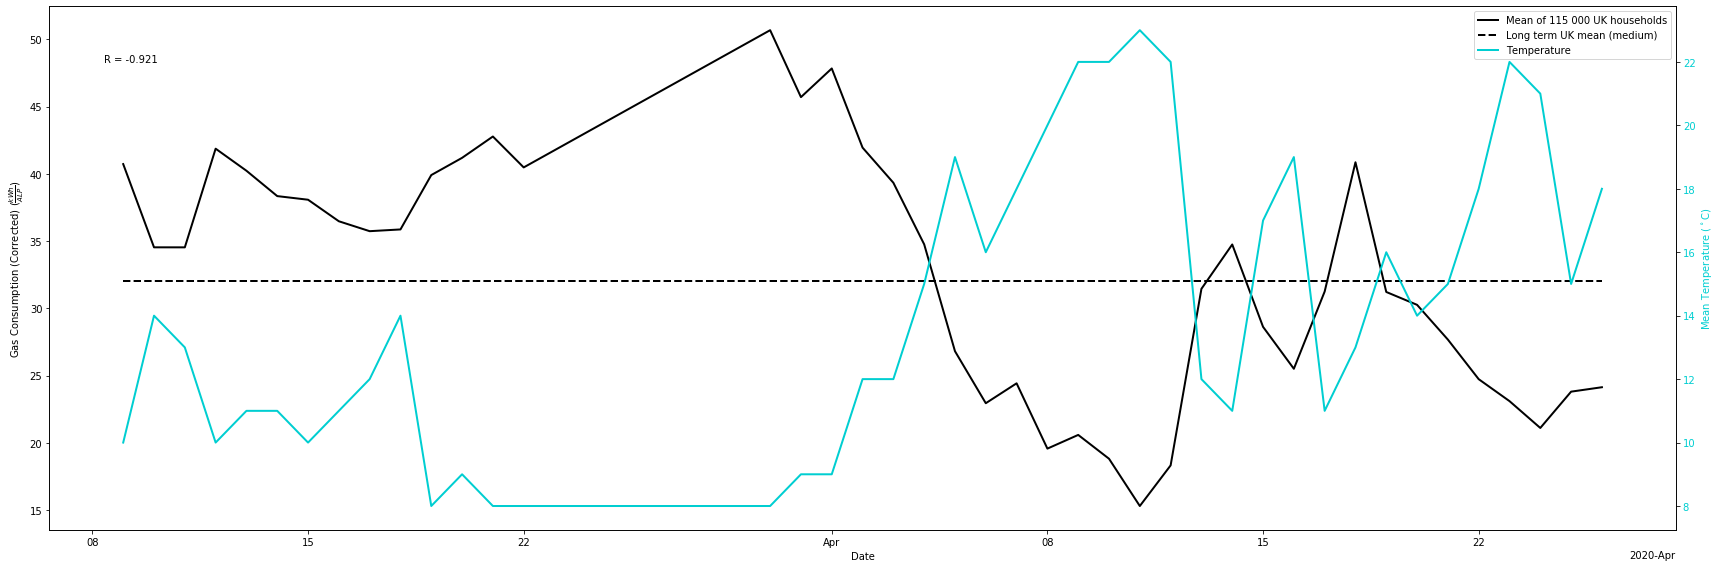

In [6]:
octopus.plot_daily_gas(figsize=(24,8), plot_temperature=True, colors=['k', 'darkturquoise'])

This relationship is even more pronounced for gas usage, which isn't too surprising because of the prevelance of gas boilers for UK central heating systems.

### National Grid
The National Grid Electricity System Operator (ESO) maintains detailed datasets of the [total demand on the electricity grid over time](https://demandforecast.nationalgrid.com/efs_demand_forecast/faces/DataExplorer). These datasets don't just take into account household usage, like Octopus Energy's data, but instead include the total demand over the whole grid, so we should be able to get a bigger picture of how electricity use has changed. You can see how we processed that data [here](/grid/Grid%20Demand.ipynb).